# Very nice plots for our nice poster :)

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Patch

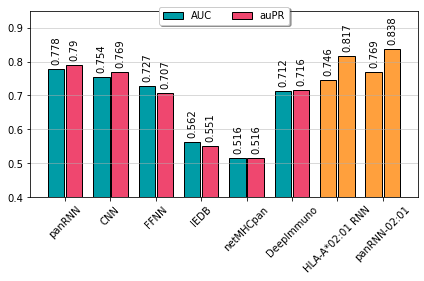

In [16]:

def bar_plot(models, ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point."""
        # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    text_offset_y = 0.02
    text_offset_x = 0.1

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):

            if models[x] != "HLA-A*02:01 RNN" and models[x] != "panRNN-02:01":
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)], edgecolor = "black")
                text = ax.text(x + x_offset - text_offset_x, y + text_offset_y, y,rotation=90)
            else:
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color="#FFA03D", edgecolor = "black")
                text = ax.text(x + x_offset - text_offset_x, y + text_offset_y, y,rotation=90)



        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        legend_elements = [Patch(facecolor='#009ca6', edgecolor='k',label='AUC'),
                         Patch(facecolor='#ef476f', edgecolor='k',label='auPR')]
        # ax.legend(bars, data.keys(), loc='upper right')
        ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)
    
    ax.set_xticks(np.arange(len(models)))
    ax.set_xticklabels(models, rotation = 45)


data = {
    "ROC": [0.778, 0.754, 0.727, 0.562, 0.516, 0.712,0.746, 0.769],
    "PR": [0.79, 0.769, 0.707, 0.551, 0.516, 0.716, 0.817, 0.838],

}

models = [ "panRNN", "CNN", "FFNN", "IEDB", "netMHCpan","DeepImmuno","HLA-A*02:01 RNN", "panRNN-02:01"]
fig, ax = plt.subplots()
bar_plot(models, ax, data, colors=["#009ca6", "#ef476f"], total_width=.8, single_width=.9)
# plt.axhline(y=0.5, color='black', linestyle='--')


plt.tight_layout()
plt.ylim(0.4,0.95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y",alpha=0.6)
plt.savefig("../plots/ROC_PR_barplot.png", dpi = 300,bbox_inches = 'tight',pad_inches =0.1)
plt.show()




## Plotting occlusion analysis

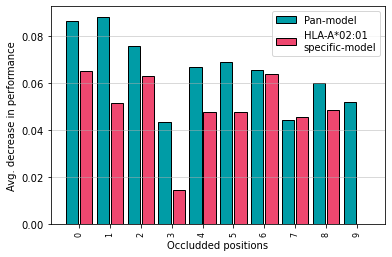

In [12]:
occlussions_simple = [0, 6, 2, 1, 8, 5, 4, 7, 3,9]
decreases_simple =[0.06518049775192632, 0.06388513931371072, 0.06322074579217433, 0.051717127145698545, 0.04840769526483812, 0.04781015895301607, 0.04765555165555164, 0.04579190693476406, 0.014477661334804173,0]

occlussions_pan = [1, 0, 2, 5, 4, 6, 8, 9, 7, 3]
decreases_pan = [0.0885094159507073, 0.08645810510266767, 0.07586633042525351, 0.06908534848461646, 0.06700936405109648, 0.06550938021654903, 0.05991443200555415, 0.05221457170909677, 0.04413099461775514, 0.04335760533493969]



sorted_simple = [decreases_simple[occlussions_simple.index(occ)] for occ in occlussions_pan]
indx_simple = np.argsort(occlussions_simple)
indx_pan = np.argsort(occlussions_pan)

ascending_occlusion_simple = np.asarray(occlussions_simple)[indx_simple]
decreases_simple2 = np.asarray(decreases_simple)[indx_simple]

ascending_occlusion_pan = np.asarray(occlussions_pan)[indx_pan]
decreases_pan2 = np.asarray(decreases_pan)[indx_pan]

fig = plt.figure()
plt.bar(np.arange(len(decreases_pan2)) - 0.23, decreases_pan2,width=0.4,label="Pan-model",color="#009ca6",edgecolor = "black")
plt.bar(np.arange(len(decreases_pan2)) + 0.23, decreases_simple2,width=0.4,label="HLA-A*02:01\nspecific-model", color="#ef476f",edgecolor = "black")
# plt.errorbar(np.arange(len(decreases_pan)), decreases_pan,yerr=sorted_std, fmt="", color="k", ls="",capsize=10)
plt.xticks(np.arange(len(ascending_occlusion_pan)),ascending_occlusion_pan,rotation=90, size=8)
plt.xlabel("Occludded positions")
plt.ylabel("Avg. decrease in performance")
plt.grid(axis="y",alpha=0.6)
plt.legend()
plt.savefig("../plots/occlusion_analysis.png",dpi = 300)